In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("01-Ad.csv")

In [3]:
df.head()

,UserID,Gender,Type,Age,EstimatedSalary,Purchased
0,1,Male,B,24,2800000,0
1,2,Male,A,48,3000000,0
2,3,Female,B,34,7800000,0
3,4,Female,B,36,10700000,0
4,5,Male,D,24,14700000,0


# ======Preprocessing========

aval moshakhas konim kodum bakhshe dataset ro mikhaim

In [4]:
x = df.iloc[:,3:5].values
y = df.iloc[:,-1].values #sotune akhar ke hamoon targete ma hast
#print ham konim bbeinim chie aslan
print(x)
print(y)

[[      24  2800000]
 [      48  3000000]
 [      34  7800000]
 [      36 10700000]
 [      24 14700000]
 [      36 10900000]
 [      36 16300000]
 [      44 30000000]
 [      33  5700000]
 [      48 12400000]
 [      34 15500000]
 [      34  9700000]
 [      25 16700000]
 [      44  2600000]
 [      22 15900000]
 [      39 15500000]
 [      67  4100000]
 [      64  4300000]
 [      65  4700000]
 [      68  4900000]
 [      64  3500000]
 [      67  9100000]
 [      68  7400000]
 [      64  3500000]
 [      65  3700000]
 [      67  3000000]
 [      70  4700000]
 [      67  5100000]
 [      39  7800000]
 [      42  2600000]
 [      42 14200000]
 [      36 27300000]
 [      27  2200000]
 [      37  8000000]
 [      36 17600000]
 [      48  4500000]
 [      45  4700000]
 [      41  9100000]
 [      34 13800000]
 [      36  5300000]
 [      36  2400000]
 [      45  9500000]
 [      48 21300000]
 [      41  2000000]
 [      37 16300000]
 [      30  3000000]
 [      33 15300000]
 [      36 10

# Train/Test Split

In [5]:
from sklearn.model_selection import train_test_split
#yechi biare ke dade haro biad split kone baramoon be train och test

In [39]:
#4ta khoruji mide bara x o y train och test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=40)
#random_state chie hala? 
#t´stratify mige beere nesbat haro az koja biare train kone masalan age 64 darsad nakharidan 36 darsda kharidan inam bere hamon nesbat ro hefz kone (mesale canser och 90 be 10)
#yaeni 25 darsad bede be test baghisho bede be train
#mishe do jur nevesht masalan age tu bazeye 0 ta 1 bashe manzoor darsade age adad massalan 120 dadi yaeni harchi hast 120 tasho begir bara test baghish khodet

In [40]:
#faghat mikham test konam alaki bebinam chi shod. hamishe ino nemikhad. inja goftim 25 darsad bede be test ke 100ta az 400 ta mishe 25 darsad dige. 75 darsade 400 ham mishe 300 ke dade be train
print(x_train.shape)
print(x_test.shape)

(300, 2)
(100, 2)


# =======Scaling========

In [13]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
#x_train ro update mikonim
x_train = scaler.fit_transform(x_train)
#kheili mohemme ke x_test fit NASHE! faghat transform beshe injuri ke nemishe kharab mishe. fit ro faghat ruye x_train ke behesh olgu bedi
#x_test faghat gharare biad test kone. olgu nabayad dashte bashe ke az un kopi kone
x_test = scaler.transform(x_test)

# =======Building model========

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#yaeni algoritmi ke miad classify mikone kelas bandi mikone dastebandi mikone

In [42]:
#ye model misazim esmesham masalan mizarim model ke gharare az knn estefade kone az 7 ta nazdiktarin hamsayeha
model = KNeighborsClassifier(n_neighbors=7)
#In mire be 7 ta az nazdiktarin hamsaye hash nazdik beshe

In [43]:
#hala bayad berim fit konim behesh yad bedim
model.fit(x_train,y_train)
#yaeni aghaye model in x o y ro begir boro ba ina tamrin kon yad begir az ina bebin ina chikar mikonan
#alan y nadarim bayad bargardim preprocessing ok konimesh

KNeighborsClassifier(n_neighbors=7)

# ======Prediction/Evaluation==============

Hala arzyabi konim bebinim model chand marde hallaje aslan khub shode ya na

# Accuracy

y_test chizi ke tavagho dashtim bege<br>y_pred mishe unchizi model hads zade predict karde

In [44]:
#aval pishbini mikonim bad sanjesh mikonim
#predict
y_pred = model.predict(x_test) #yaeni hamin x_test ke midim boro pishbini kon. mire ba x_test y_pred tolid mikone pishbini mikone
#print lazem nis alan faghat mikham ke bebinam chejuri shod
print(y_pred)
print(y_test)

[0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0
 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0]
[0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0]


In [28]:
#evaluate konim hala
from sklearn.metrics import accuracy_score
#mikhaym accuracy ro bebinim

In [45]:
accuracy = accuracy_score(y_test,y_pred)
#yaeni bia y_test ke aslia hast vaghean hast ro ba y_pred (unchizi ke model hads zade) moghayese kon nomrasho begu
print(f"Accuracy: {accuracy*100}%")

Accuracy: 91.0%


Har seri ke biam köra konam az aval ye accuracy dige mishe chon har seri tasadofi adad bar midare

Bazi vaghta accuracy shakhese monasebi nis behtare ke masalan chiza dige yad begirim

# Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test,y_pred,labels=[0,1])
#y test chizi ke dar vaghe hast och y_pred ham chizi ke hads zadim
#ba labels mishe taghir bedi 0 va 1 bashe ya 1 va 0 yaeni ke kodum positive bashe kodum negativ avali negative mishe dovomi mosbat
#bazi jaha tu bazi modela moheme ke kio mosbat migiri kio manfi
#b soorate pishfarz sort shodeye y_test ro dar anzar migire
print(cm)

[[59  5]
 [ 4 32]]


In [52]:
#aval ye dataframe misazim ba estefade az pandas
cm_df = pd.DataFrame(cm,index=[0,1],columns=[0,1])
print(cm_df)
#age bekhaim masalan 0 va 1 ro bebinim befahmim dastan chie?
#index yaeni tuye unja ke rasm mikone cm ro biad be labele SATR HA chi bege? Ke dar inja man zadam index=[0,1] yaeni yekish bashe 0 yekish bashe 1
#columns = [0,1] ham ke mishe esm ya labele sotun  ha

    0   1
0  59   5
1   4  32


# ================ Normalized COnfusion Matrix ==========

# ==========Heatmap=====================

In [51]:
import seaborn as sns

[[59  5]
 [ 4 32]]


Text(50.722222222222214, 0.5, 'Actual')

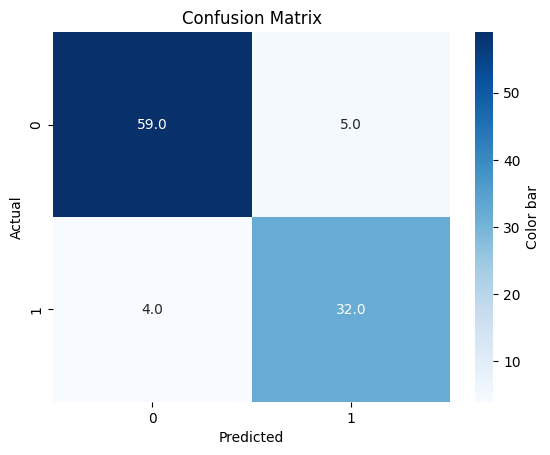

In [53]:
print(cm)
sns.heatmap(cm,cmap="Blues",annot=True,cbar_kws={"label":"Color bar"},fmt="0.1f")

#annot = True yaeni annotation dashte bashe hamon label hayi ke bara actual och predicted dashtim un bala tu cm
#cmap yaeni colormap
#fmt="0.2f" yaeni ta 2 raghame ashar
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
#annot=True ke bezarim adada ro miad mizare mibini annars neshun nemide

# F1 score

In [54]:
from sklearn.metrics import f1_score

In [55]:
f_score = f1_score(y_test,y_pred,labels=[0,1])

In [56]:
print(f_score)

0.8767123287671232


#in ke az chi estefade koni bara gozaresh daste khodete ama osulan hamaro gozaresh midan

# ===== VISUALISATION OF THE MODEL ========

In [58]:
#KNN mitune gheyre khati bashe nemoodaresh
model_name = "KNN KOOLAC"
is_scaled = True

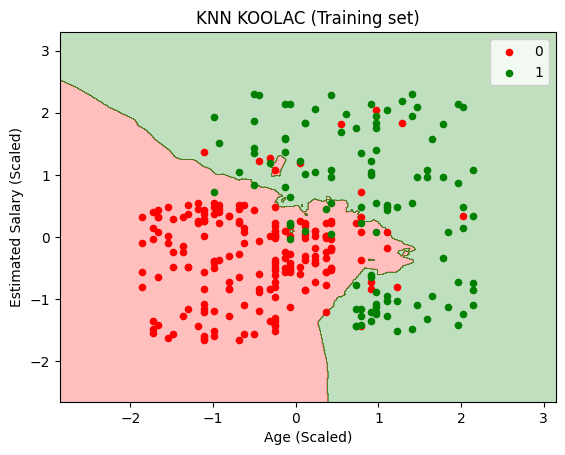

In [59]:
from matplotlib.colors import ListedColormap
cmap=ListedColormap(["red","green"])

x_set,y_set=x_train,y_train

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.25,cmap=cmap)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], s=20, color=cmap(i), label=j)
plt.title(f"{model_name} (Training set)")
plt.xlabel("Age (Scaled)" if is_scaled else "Age")
plt.ylabel("Estimated Salary (Scaled)" if is_scaled else "Estimated Salary")
plt.legend()
plt.show()
